**PRODUCTION ENGINEER | DATA SCIENTIST**




Rodrigo Viannini


Date: 2023-06-20


https://www.linkedin.com/in/rodrigo-viannini-datascientist/

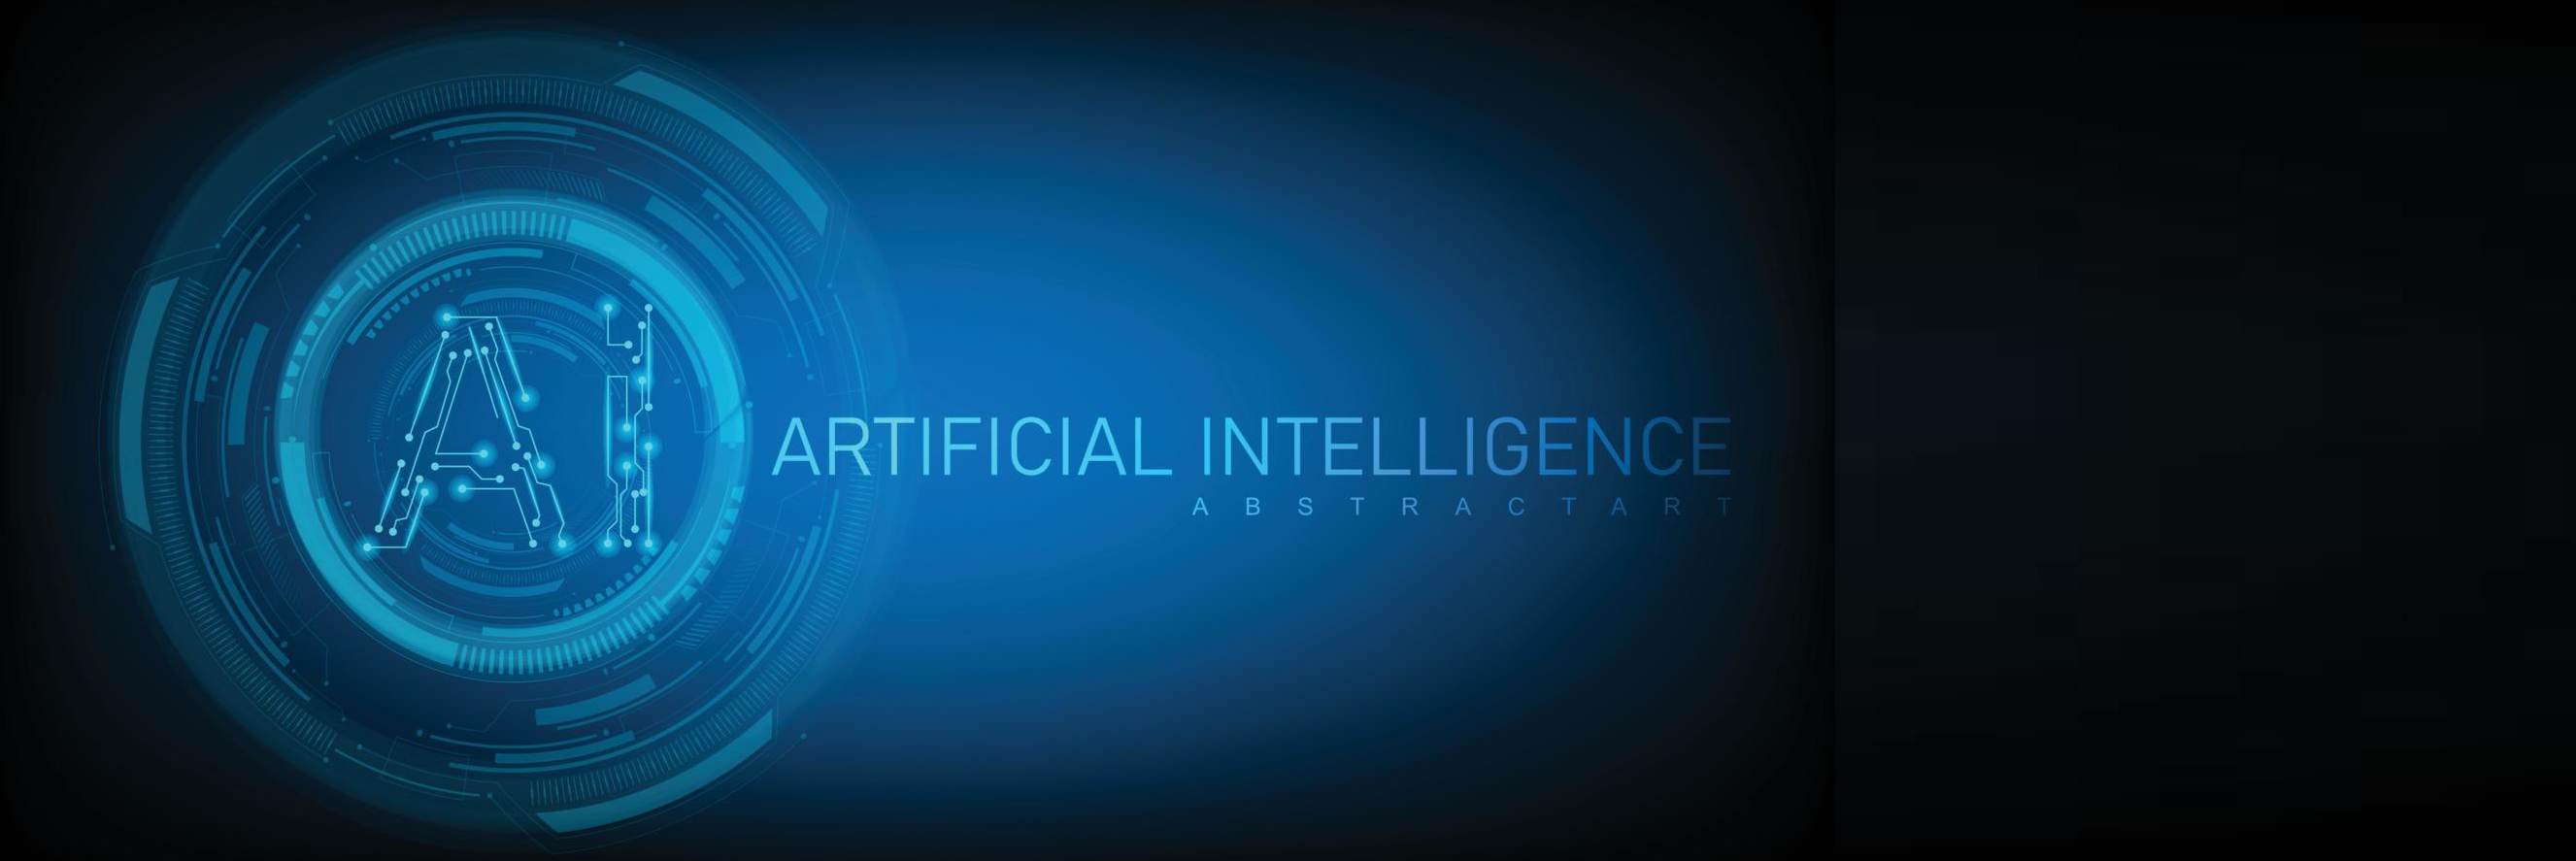

#**CONTEXT**

Company: e-commerce

An e-commerce company markets products through its web site and through
your mobile app. To make a purchase, a customer registers
on the portal (using web site or app). Each time the customer logs in, the system registers
the time you are logged in, either on the app or on the website. For each client, the company maintains
the sales record with the total spent per month. The company would like to increase sales,
but the budget allows you to invest only in the website or the app at this time.
The objective is to improve the customer's experience while navigating the system,
increasing the logged time, increasing the engagement and, consequently,
increasing sales. As a Data Scientist, I will help the company take this
decision.
As the objective here is to predict a value (number), the approach will be learning
supervised for Linear Regression, creating different versions of the model with different
algorithms and we will go through the entire Machine Learning process from end to end.
The entire project is described according to its stages





#**DATA**

https://drive.google.com/file/d/1YAJMbsKA2F6T2BmPfOhndMrmvJH06uR-/view

The data used in this mini-project are fictitious but represent real data for
e-commerce companies. The data represents one month of operation of the e-commerce portal. The title of each column in the dataset is self-explanatory



- Records the duration of customer login;
- Records sales.

**customer_registration_time:** Time that the customer has been registered. The number of months has been converted to years. [float64]

**average_number_clicks_per_session:** Average number of clicks (or touches) per session. [float64]

**total_time_logged_app:** Total time logged in the app in minutes. [float64]

**total_time_logged_website:** Total time logged on the website in minutes. [float64]

**total_value_spent:** Total amount spent by the customer in one month in BRL (R$). [float64]


Objective 1:
- Invest in the app or the website?

Objective 2:

- Customer login duration;
- Increase in sales.

#**IMPORTS**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Function 'python_version' from package 'platform'
from platform import python_version

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Framework for Machine Learning
import sklearn
from sklearn.model_selection import train_test_split                            # Split data into training and testing
from sklearn.preprocessing import StandardScaler                                # To do data standardization
from sklearn.linear_model import LinearRegression                               # Algorithm for linear regression
from sklearn.linear_model import Ridge                                          # Linear regression with regularization
from sklearn.linear_model import Lasso                                          # Linear regression with regularization + shrinking its coeficients to zero
from sklearn.metrics import mean_absolute_error, mean_squared_error             # Metrics for model evaluation
from sklearn.metrics import r2_score, explained_variance_score                  # Metrics for model evaluation

# Sets the overall style for seaborn graphics
sns.set_style('whitegrid')

# Plot the graphs inside jupyter notebook
%matplotlib inline

# "Warnings" package for controling warnings
import warnings

# Ignore warning messages
warnings.filterwarnings('ignore')

**CHECKING LIBRARY VERSION TO BUILD A REQUIREMENTS.TXT**

In [3]:
import pkg_resources

# Lista das bibliotecas importadas no código
libraries = ['numpy', 'pandas', 'seaborn', 'matplotlib', 'scikit-learn']

# Obtém as versões das bibliotecas importadas
versions = [(lib, pkg_resources.get_distribution(lib).version) for lib in libraries]

# Imprime as versões das bibliotecas importadas
list_lib = []
for lib, version in versions:
    list_lib.append(f'{lib}=={version}')

# Salvar lista em um arquivo requirements.txt
with open('requirements.txt', 'w') as file:
    file.write('\n'.join(list_lib))

In [4]:
# CVopying 'requirements.txt' file to Google Drive
%cp -r /content/requirements.txt /content/drive/MyDrive/GITHUB/e-commerce

#**DATA EXPLORATION**

In [5]:
# Original Dataset
df_original = pd.read_csv('/content/drive/MyDrive/GITHUB/e-commerce/dataset.csv')
df_original.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

In [174]:
# # Renaming columns from Portuguese to English
df_original = df_original.rename(columns={'tempo_cadastro_cliente': 'customer_registration_time',
                                          'numero_medio_cliques_por_sessao': 'average_number_clicks_per_session',
                                          'tempo_total_logado_app': 'total_time_logged_app',
                                          'tempo_total_logado_website': 'total_time_logged_website',
                                          'valor_total_gasto': 'total_value_spent'})
df_original.head(2)

,customer_registration_time,average_number_clicks_per_session,total_time_logged_app,total_time_logged_website,total_value_spent
0,3.472021,33.119954,12.953263,37.034280,534.771485
1,4.198349,35.371876,10.572467,36.862183,537.915753


In [7]:
# Best practices: Creating a copy of the original dataset if necessary
df = df_original.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_registration_time         500 non-null    float64
 1   average_number_clicks_per_session  500 non-null    float64
 2   total_time_logged_app              500 non-null    float64
 3   total_time_logged_website          500 non-null    float64
 4   total_value_spent                  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [9]:
# Viewing a random sample of the data
df.sample(10)

,customer_registration_time,average_number_clicks_per_session,total_time_logged_app,total_time_logged_website,total_value_spent
277,3.634094,33.177205,11.622777,35.968896,501.209173
192,2.652158,34.338729,10.716355,38.307204,426.775216
260,2.307552,32.530829,12.354607,37.122345,420.916159
251,3.195626,32.559493,11.797796,37.777366,468.668466
72,2.258686,32.044486,13.414935,36.112435,448.229829
456,3.738225,31.862741,14.039867,37.022269,556.298141
378,3.532862,32.302553,11.979061,38.269061,478.600916
389,3.434560,32.077590,10.347877,39.045156,401.033135
75,4.113226,32.726785,12.988510,36.462003,563.672873
206,4.520353,33.154255,11.795887,37.658617,550.047581


In [10]:
# Data correlation - The df.corr() function is useful for identifying patterns and relationships between different variables in a data set [ -1 to 1 ]
df.corr()

,customer_registration_time,average_number_clicks_per_session,total_time_logged_app,total_time_logged_website,total_value_spent
customer_registration_time,1.000000,0.060247,0.029143,-0.047582,0.809084
average_number_clicks_per_session,0.060247,1.000000,-0.027826,-0.034987,0.355088
total_time_logged_app,0.029143,-0.027826,1.000000,0.082388,0.499328
total_time_logged_website,-0.047582,-0.034987,0.082388,1.000000,-0.002641
total_value_spent,0.809084,0.355088,0.499328,-0.002641,1.000000


                                   customer_registration_time  \
customer_registration_time                           1.000000   
average_number_clicks_per_session                    0.060247   
total_time_logged_app                                0.029143   
total_time_logged_website                           -0.047582   
total_value_spent                                    0.809084   

                                   average_number_clicks_per_session  \
customer_registration_time                                  0.060247   
average_number_clicks_per_session                           1.000000   
total_time_logged_app                                      -0.027826   
total_time_logged_website                                  -0.034987   
total_value_spent                                           0.355088   

                                   total_time_logged_app  \
customer_registration_time                      0.029143   
average_number_clicks_per_session              -0.027826

<Figure size 1200x800 with 0 Axes>

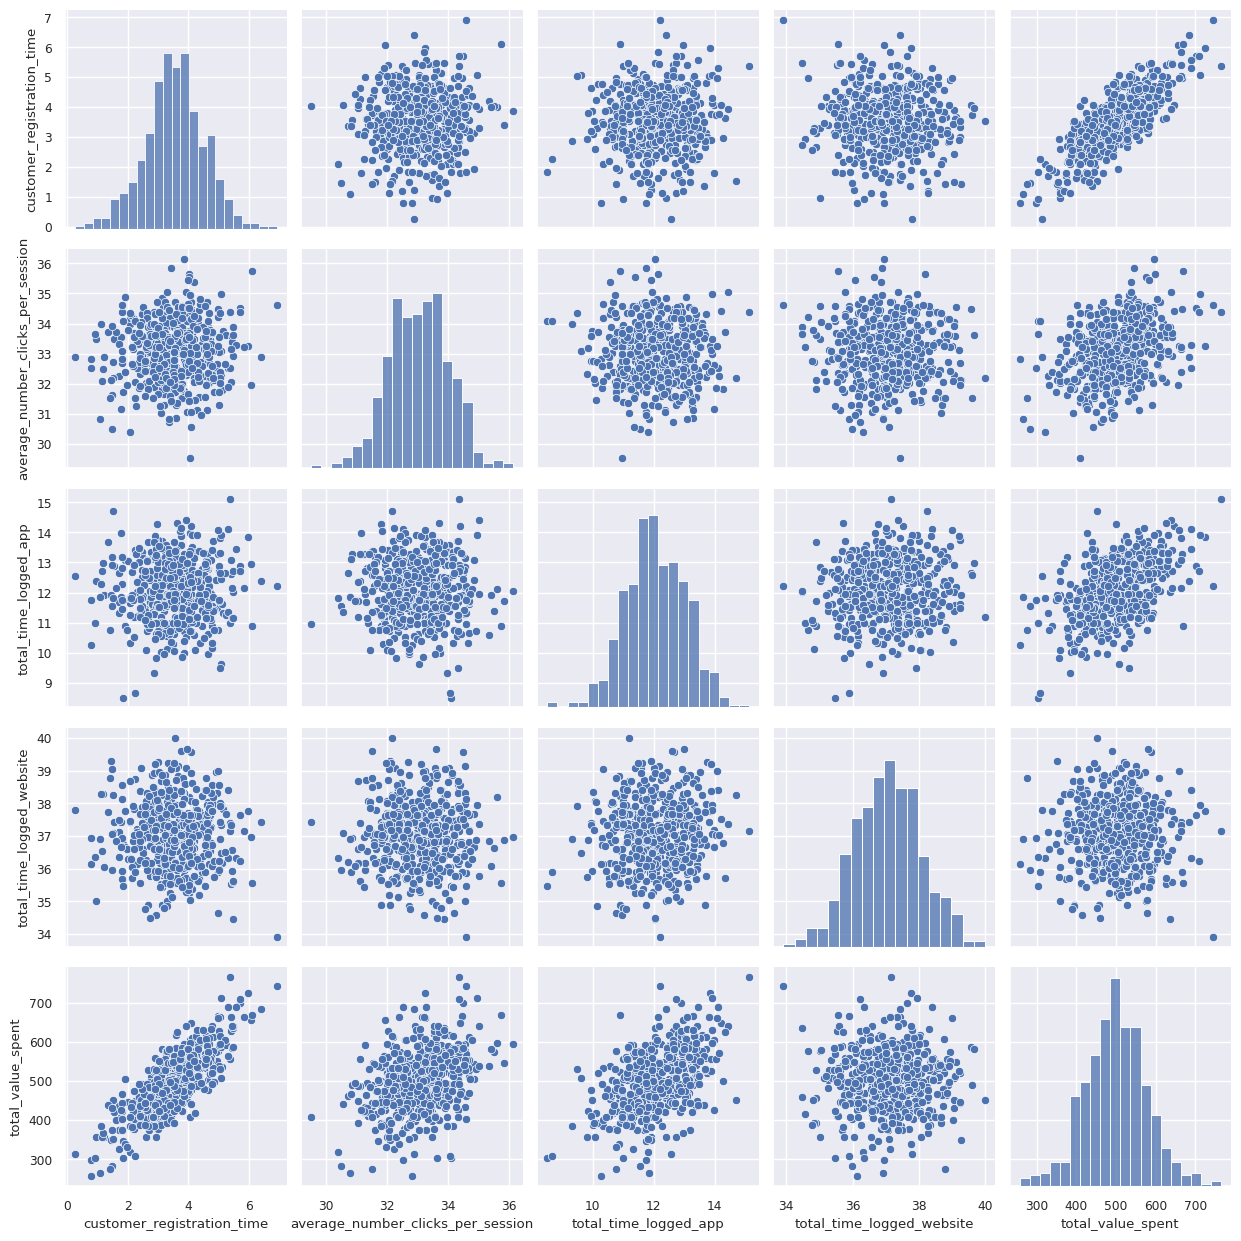

In [11]:
# Graphs - Data correlation - The function creates a matrix of scatterplots (scatter plots) to visualize the relationships between pairs of variables in a DataFrame named df.

# Select only the numeric columns from the dataframe
numeric_df = df.select_dtypes(include='number')

# Set the figure size and font scale
plt.figure(figsize=(12, 8))
sns.set(font_scale=0.8)

# Plot the pairplot with scatter plots
pairplot = sns.pairplot(numeric_df, kind="scatter")

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Adjust layout to prevent overlap of labels
plt.tight_layout()

# Show the pairplot
plt.show()


Interpreting:

The correlation is a statistical measure that indicate the relationship between two variables. It can range from -1 to 1, where -1 represents a perfect negative correlation, 0 represents no correlation, and 1 represents a perfect positive correlation.

Looking at the provides  correlation matrix, mwe can see the following:

1- The variable "customer_registration_time" has a positive correlation of 0.809 with "total_value_spent". This suggests a strong relatiiionship between customer registration time and the total amount spent by the customers. The longer the customer is registered , the greater the amount spent;

2- The variable "total_time_logged_app" has a positive correlation of 0.499 with "total_value_spent". This suggests that there  is a moderate relationship between  the total time spent on the app and the total amount spent by the customer. The more time  a customer  spends on the app, the greater ther amount spent;

3- The variable "total_time_logged_website" has aweak negative correlation of -0.003 with "total_value_spent". This close to zero correlation  indicate that there is no significant relationship between the total time spent on the site and total amount spent by the customer.

In summary, based on the data provided, it appears that customer registration time, average number of clicks per session, and total time spent in the app are most strongly related to the total amount spent by the customer. However, it is important to note that the complete interpretation of the data may depend on other factors and specific contexts of the problem in question.

customer_registration_time         average_number_clicks_per_session    0.060247
                                   total_time_logged_app                0.029143
                                   total_time_logged_website           -0.047582
                                   total_value_spent                    0.809084
average_number_clicks_per_session  customer_registration_time           0.060247
                                   total_time_logged_app               -0.027826
                                   total_time_logged_website           -0.034987
                                   total_value_spent                    0.355088
total_time_logged_app              customer_registration_time           0.029143
                                   average_number_clicks_per_session   -0.027826
                                   total_time_logged_website            0.082388
                                   total_value_spent                    0.499328
total_time_logged_website   

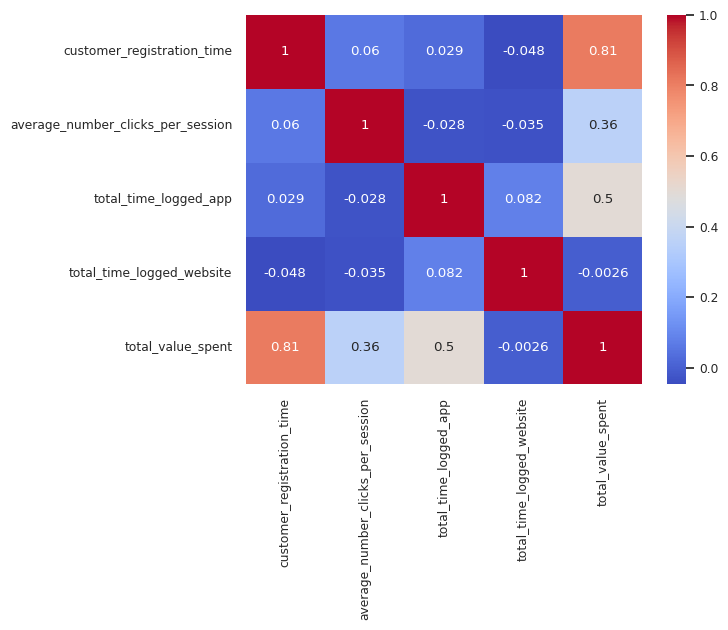

In [12]:
# Select only the numeric columns from the dataframe
numeric_df = df.select_dtypes(include='number')

# Calculate the Pearson correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Convert the correlation matrix to a Pandas Series
correlation_series = correlation_matrix.unstack()

# Remove self-correlations (diagonal elements)
correlation_series = correlation_series[correlation_series.index.get_level_values(0) != correlation_series.index.get_level_values(1)]

# Display the correlation values as a Series
print(correlation_series)


This correlation matrix shows the relationship between different variables. Each cell represents the correlation between two specific variables.

Observing the correlation values, we can make the following interpretations:

1- The variable "customer_registration_time" has a strong positive correlation of 0.809 with "total_value_spent". This means that there is a significant relationship between customer registration time and the total amount spent. The longer a customer is registered, the greater the amount spent.

2- The variable "average_number_clicks_per_session" has a moderate positive correlation of 0.355 with "total_value_spent". This suggests that there is a reasonable relationship between the average number of clicks per session and the total amount spent. Customers who have more clicks per session tend to spend more.

3- The variable "total_time_logged_app" has a moderate positive correlation of 0.499 with "total_value_spent". This indicates that there is a reasonable relationship between the total time spent on the app and the total amount spent by the customer. The more time a customer spends on the app, the greater the amount spent.

4- The variable "total_time_logged_website" has a very weak correlation close to zero (-0.003) with "total_value_spent". This indicates that there is no significant relationship between the total time spent on the site and the total amount spent by the customer.

In summary, the results suggest that customer registration time, average number of clicks per session, and total time spent in the app are most strongly related to the total amount spent by the customer. However, it is important to consider other factors and contexts for a complete interpretation of the data.

The provided output is a correlation matrix in the form of a Pandas Series. Each row represents a pair of variables, and the corresponding correlation value is shown in the last column. Here's how to interpret it:

The first row shows the correlations of the variable "customer_registration_time" with other variables. For example, it has a correlation of 0.060247 with "average_number_clicks_per_session," 0.029143 with "total_time_logged_app," -0.047582 with "total_time_logged_website," and 0.809084 with "total_value_spent."

The second row represents the correlations of "average_number_clicks_per_session" with other variables. For instance, it has a correlation of 0.060247 with "customer_registration_time," -0.027826 with "total_time_logged_app," -0.034987 with "total_time_logged_website," and 0.355088 with "total_value_spent."

The remaining rows follow a similar pattern, indicating the correlations between different pairs of variables.

The correlation values range between -1 and 1, where 1 indicates a strong positive correlation, -1 indicates a strong negative correlation, and 0 represents no correlation. In this case, the correlation values range from -0.047582 to 0.809084.

For example, a correlation of 0.809084 between "customer_registration_time" and "total_value_spent" suggests a strong positive relationship, indicating that as the customer registration time increases, the total value spent also tends to increase.

Similarly, a correlation of -0.034987 between "average_number_clicks_per_session" and "total_time_logged_website" indicates a weak negative relationship, implying that as the average number of clicks per session increases, the total time logged on the website tends to decrease slightly.

These correlation values provide insights into the linear relationships between the variables, helping to understand how they are related to each other. However, it's important to note that correlation does not imply causation, and further analysis is needed to make any causal interpretations.

## ANALYSIS 1

Relationship between time on the website and amount spent

<Figure size 1800x1200 with 0 Axes>

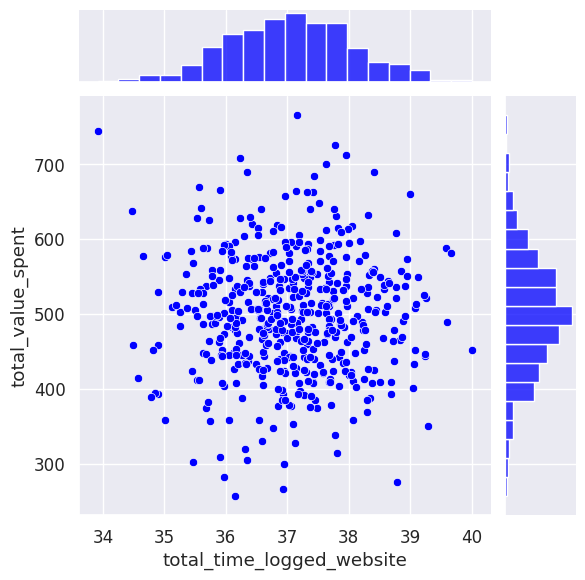

In [13]:
# joinplot - It's a type of graph in Seaborn that combines a scatter plot with histograms or kernel density estimates (KDE) on the marginal axes.
plt.figure(figsize=(18,12))
sns.set(font_scale = 1.1)

sns.jointplot(data=df,
x = 'total_time_logged_website',
y = 'total_value_spent',
color = 'blue')

Interpreting:

1- Looking at the histogram, we can see that the data isnormally distributed. [ follow a normal distributed ]


2- Looking at the scatter plot, there doesn't seem to be a correlation between  the two variables;


3- Let's confirm by calculating the correlation coefficient between them.




In [14]:
# Correlation
df[['total_time_logged_website', 'total_value_spent']].corr()

,total_time_logged_website,total_value_spent
total_time_logged_website,1.000000,-0.002641
total_value_spent,-0.002641,1.000000


Interpreting:

1- There does not seem to be a correlation between the time logged into the website and the amount spent by users customers.

##ANALYSIS 2

Relationship between time on app and amount spent

In [15]:
# columns
df.columns

Index(['customer_registration_time', 'average_number_clicks_per_session',
       'total_time_logged_app', 'total_time_logged_website',
       'total_value_spent'],
      dtype='object')

<Figure size 1800x1200 with 0 Axes>

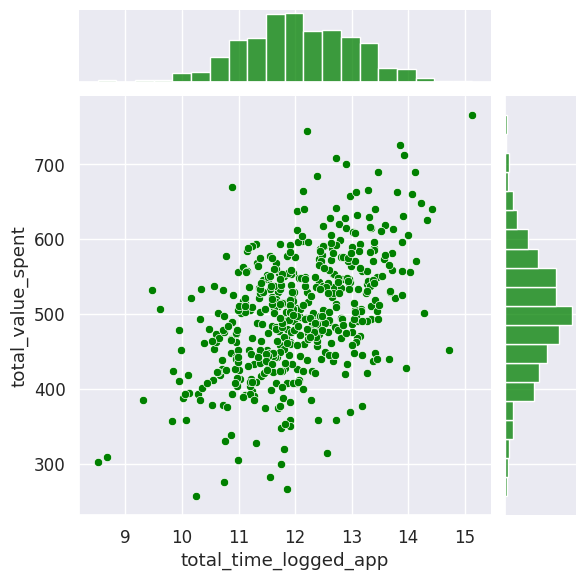

In [16]:
# joinplot - It's a type of graph in Seaborn that combines a scatter plot with histograms or kernel density estimates (KDE) on the marginal axes.
plt.figure(figsize=(18,12))
sns.set(font_scale = 1.1)

sns.jointplot(data=df,
x = 'total_time_logged_app',
y = 'total_value_spent',
color = 'green')

Interpreting:


1- Looking at the histogram, we can see that the data is normally distributed [ follow a normal distribution ];

2- Observing the scatter plot, there seems to be a positive correlation between the two variables;

3- Let's confirm by calculating the correlation coefficient between them.

In [17]:
# Correlation
df[['total_time_logged_app', 'total_value_spent']].corr()

,total_time_logged_app,total_value_spent
total_time_logged_app,1.000000,0.499328
total_value_spent,0.499328,1.000000


Interpreting:

1- The data has a moderate positive correlation. We can deduce that the total amount spent monthly tends to increase if the customers spends more time logged into the app.

## ANALYSIS 3

Relationship between time on the app and registration time.

In [18]:
# columns
df.columns

Index(['customer_registration_time', 'average_number_clicks_per_session',
       'total_time_logged_app', 'total_time_logged_website',
       'total_value_spent'],
      dtype='object')

<Figure size 1800x1200 with 0 Axes>

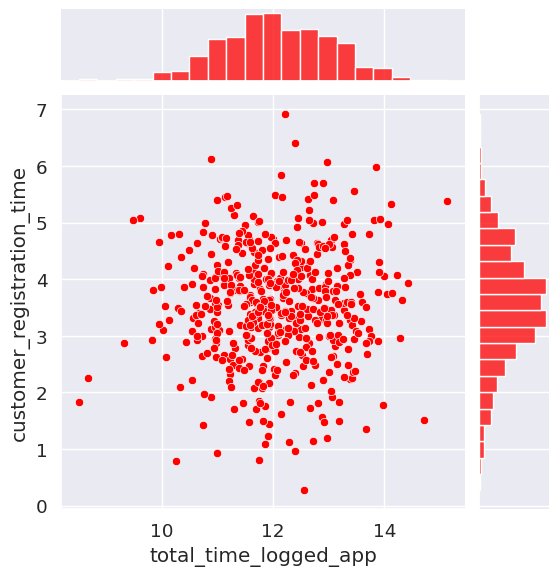

In [19]:
# Plot (jointplot):
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.2)
sns.jointplot(data = df,
x = 'total_time_logged_app',
y = 'customer_registration_time',
color = 'red')

Interpreting:

1- Looking at the histogram, we can see that the data is normally distribuited [ follow a normal distribution ];

2- From the scatter plot we can see that the data is very dense in the middle of the plot and there is no clear correlation;

3- We can deduce that there are manycustomers who have been members for 3 - 4 years and spend approximately 11,5 - 12,5 minutes on the app.

##ANALYSIS 4

Relationship between registration time and amount spend

In [20]:
# columns
df.columns

Index(['customer_registration_time', 'average_number_clicks_per_session',
       'total_time_logged_app', 'total_time_logged_website',
       'total_value_spent'],
      dtype='object')

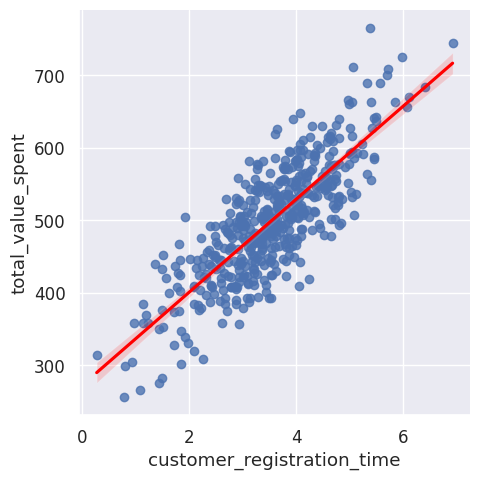

In [21]:
# lmplot - Function that creates a scatter plot with a regression line fitted to the data. It is used to visualize the relationship between two continuous variables and estimate a trendline.
sns.set(font_scale = 1.1)
sns.lmplot(y = "total_value_spent", x = "customer_registration_time", data=df, line_kws={"color": "red"})

Interpreting:

1- The line is adjusted in relation to the data, very evident in the central region.

In [22]:
# correlation
df[['customer_registration_time', 'total_value_spent']].corr()

,customer_registration_time,total_value_spent
customer_registration_time,1.000000,0.809084
total_value_spent,0.809084,1.000000


Interpreting:

1- From the lmplot and the correlation coefficient, we can see that the registration time and tootal amount spent have a strong positive correlation, i.e., as the customer becomes older [ longer registration time ], the total amount spending by customers also increases;

2- Another detail to note is that the shadow around the line is very thin, what does the errors mean between the estimate (line) and the data points are relatively small.

##ANALYSIS 5

Relationship between total time logged app and time logged at the website

<Figure size 1800x1200 with 0 Axes>

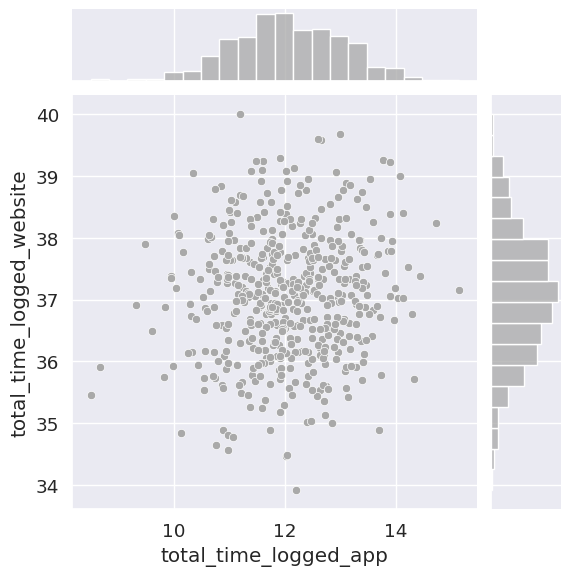

In [23]:
# Plot (jointplot):
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.2)
sns.jointplot(data=df, x='total_time_logged_app', y='total_time_logged_website', color='darkgrey')

Interpreting:

1- Slightly asymmetrical distribution indicating that the time logged in the app is longer than on the website. But it shows no significant relationship.

In [24]:
# Calculate the skewness
skewness_app = df['total_time_logged_app'].skew()
skewness_website = df['total_time_logged_website'].skew()

# Print the skewness value
print("Skewness_app:", skewness_app)
print("Skewness_website:", skewness_website)

Skewness_app: -0.08912109679800799
Skewness_website: 0.012141880955778936


**skewness_app**

A skewness of -0.089 indicates a slight left (negative) skewness in the distribution of the 'total_time_logged_app' variable.

Asymmetry is a statistical measure that indicates the degree of deviation of the distribution of a variable in relation to the normal distribution. If the skew is positive, the distribution has a longer tail on the right and is called right (or positive) skew. If the skewness is negative, the distribution has a longer left tail and is called left (or negative) skewness. If the skewness is close to zero, the distribution is approximately symmetric.

In the case of your 'total_time_logged_app' variable, the skewness is -0.089, which indicates a slight left skewness. This means that the distribution of the variable has a longer left tail, that is, there are smaller values ​​that are farther from the mean than larger values. However, this asymmetry is considered mild, as the value is close to zero.

When interpreting skewness, it is important to consider the context of the problem and look at other descriptive statistics as well as visualize the distribution of the data to gain a more complete understanding of the shape of the distribution.

**skewness_website**

A skewness of 0.012 indicates a slight right (positive) skewness in the distribution of the variable.

Asymmetry is a statistical measure that indicates the degree of deviation of the distribution of a variable in relation to the normal distribution. If the skew is positive, the distribution has a longer tail on the right and is called right (or positive) skew. If the skewness is negative, the distribution has a longer left tail and is called left (or negative) skewness. If the skewness is close to zero, the distribution is approximately symmetric.

In the case of your variable, the skewness is 0.012, which indicates a slight skewness to the right. This means that the distribution of the variable has a longer tail to the right, that is, there are larger values ​​that are farther from the mean than smaller values. However, this asymmetry is considered mild, as the value is close to zero.

It is important to remember that the interpretation of asymmetry must be done in conjunction with other descriptive statistics and visualization of the data distribution to have a more complete understanding of the shape of the distribution.

In [25]:
# Calcular a matriz de correlação
correlation_matrix = df[['total_time_logged_app', 'total_time_logged_website']].corr()

# Obter a correlação específica entre as duas variáveis
correlation = correlation_matrix.loc['total_time_logged_app', 'total_time_logged_website']

# Imprimir o valor da correlação
print("Correlation_between_two_variables:", correlation)

Correlation_between_two_variables: 0.08238827323027031


#**MACHINE LEARNING**

Data Pre-Processing for Building Models
machine learning

In [28]:
# see columns
df.columns

Index(['customer_registration_time', 'average_number_clicks_per_session',
       'total_time_logged_app', 'total_time_logged_website',
       'total_value_spent'],
      dtype='object')

In [109]:
# Input variables (predictor variables)
X = df[[
    'customer_registration_time',
    'average_number_clicks_per_session',
    'total_time_logged_app',
    'total_time_logged_website'
    ]]

In [110]:
# Output variable (target variable or target):
y = df['total_value_spent']

In [111]:
# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [112]:
# training data size
len(X_train)

350

In [113]:
# Looking ath the first 5 rows of the training dataframe
X_train[:5]

,customer_registration_time,average_number_clicks_per_session,total_time_logged_app,total_time_logged_website
202,3.309182,32.838100,12.364342,38.039109
428,5.405406,33.172331,13.078692,37.329819
392,3.525806,32.602739,11.764448,37.922704
86,3.471919,32.843930,11.832286,36.814011
443,1.428824,31.517122,10.745189,38.791235


In [114]:
# testing data size
len(X_test)

150

In [115]:
# Looking ath the first 5 rows of the testing dataframe
X_test[:5]

,customer_registration_time,average_number_clicks_per_session,total_time_logged_app,total_time_logged_website
18,2.768852,33.431097,13.350632,37.965972
361,4.069917,33.419067,13.391120,37.194191
104,4.802631,32.227299,13.728627,37.997028
4,4.034386,32.770492,11.371767,35.261498
156,5.485977,32.931336,12.732212,35.600821


##PATTERNING

The StandardScaler class is used to standardize the data in a dataset. This means that it adjusts the data so that it has a mean of zero and a standard deviation of 1. This standardization is useful when dealing with machine learning algorithms that assume the data are on a similar scale.

In [116]:
# Creating an instance of the StandardScaler class:
scaler = StandardScaler()

In [117]:
# Training the patterner
scaler.fit(X_train)

StandardScaler()

In [118]:
# Applying the standardizer to the training data:
X_train = scaler.transform(X_train)
X_train[:5]

array([[-0.21902935, -0.23735512,  0.33914084,  0.92765292],
       [ 1.8073082 ,  0.09393489,  1.05266311,  0.2388907 ],
       [-0.00962736, -0.47064535, -0.26005737,  0.81461639],
       [-0.06171807, -0.23157636, -0.19229742, -0.26198867],
       [-2.03669802, -1.54671013, -1.27813419,  1.65800995]])

In [119]:
# Applying the standardizer to the testing data:
X_test = scaler.transform(X_test)
X_test[:5]

array([[-0.74134552,  0.35042401,  1.32428694,  0.85663193],
       [ 0.51634261,  0.33850011,  1.36472848,  0.1071885 ],
       [ 1.22462847, -0.84278168,  1.70184401,  0.88678948],
       [ 0.48199668, -0.30436824, -0.65228214, -1.76956776],
       [ 1.88519232, -0.14493923,  0.70658414, -1.44006612]])

#**CONSTRUCTION, TRAINING AND EVALUATION OF MODEL 1 WITH LINEAR REGRESSION (BENCHMARK)**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

**MODEL EXPLANATION**

The linear regression model in scikit-learn follows the general mathematical formula for a simple linear regression model, where we attempt to predict an output value (dependent variable) based on one or more input variables (independent variables). To simplify, I will explain the formula for a simple linear regression model with a single input variable.

The formula for a simple linear regression model is given by:

y = mx + b

Where:

y is the output value we want to predict.
x is the input variable.
m is the slope coefficient, which represents the relationship between the input variable and the output.
b is the intercept coefficient, which represents the value of y when x is equal to zero.
In scikit-learn, when creating and training a linear regression model, the algorithm adjusts these coefficients (m and b) to find the best fitting line to the training data. It does this by minimizing the sum of squared errors (MSE) between the model's predictions and the actual values.

When using the fit(X, y) method on the linear regression model in scikit-learn, where X is the input variables and y is the corresponding output values, the algorithm finds the coefficients m and b that best fit the training data. Once trained, the model is ready to make predictions for new data using the predict(X_new) method, where X_new is the new input data.

It is important to note that the linear regression model in scikit-learn also allows for the creation of multiple linear regression models, where there are multiple input variables. The mathematical formula is an extension of the equation above, including the coefficients corresponding to each input variable.

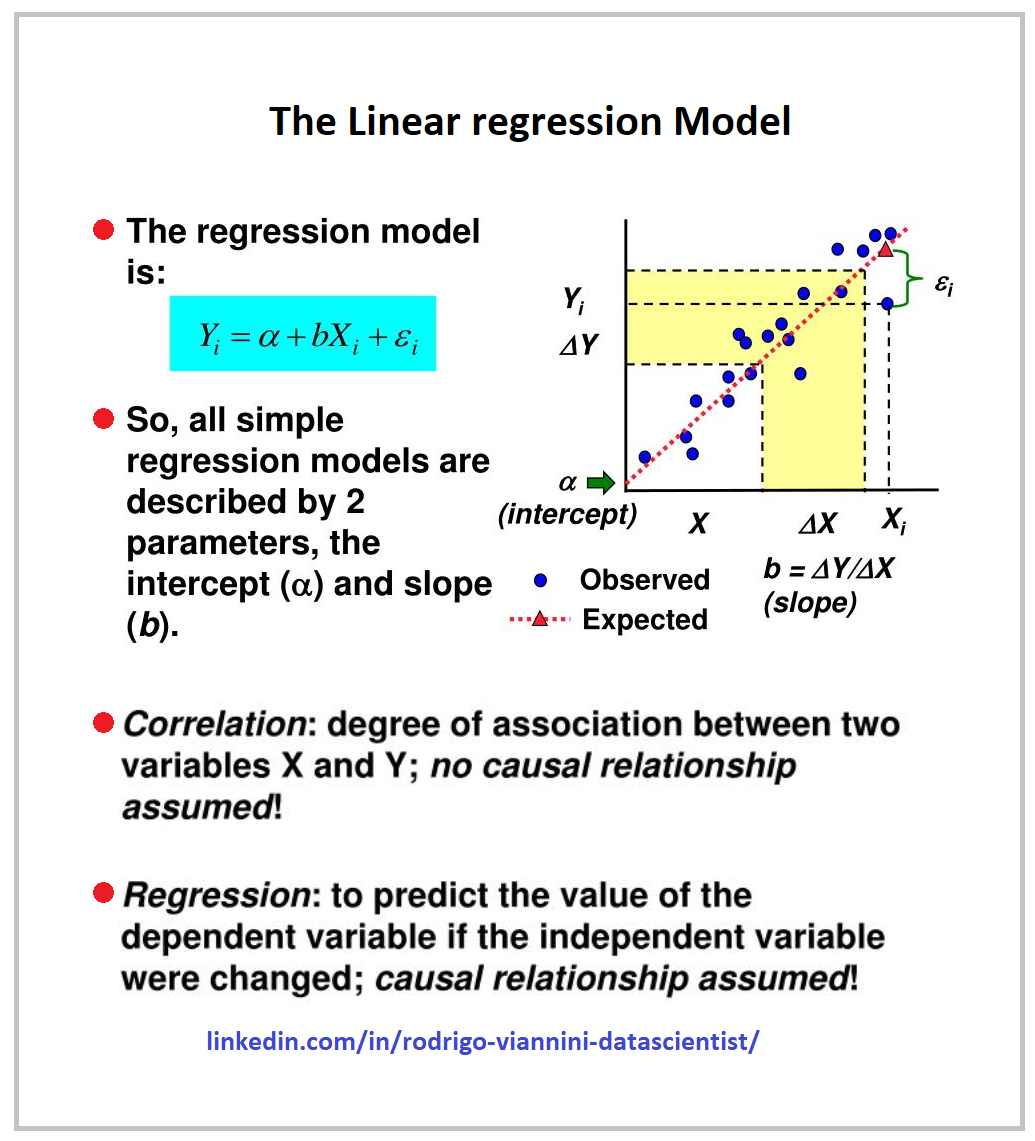

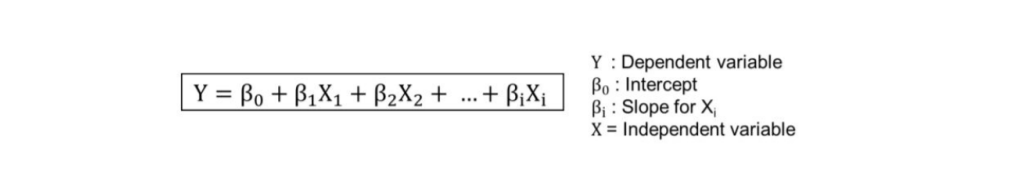

In [120]:
# Creating the model (instantiating the LinearRegression() class)
model_v1 = LinearRegression()
# Training the model:
model_v1.fit(X_train, y_train)

LinearRegression()

In [121]:
# Training the model: Checking the model coefficients
print('Coefficients: \n', model_v1.coef_)

Coefficients: 
 [63.74220716 26.23901606 38.57185551  0.6847366 ]


Interpreting:

- The coefficients returned are:   _[ 70.56752243 , 26.94402139 , 38.70638358 , 0.74780523 ]_


- These values represent the weights assigned to each input variable in the linear regression model. Each coefficient indicates the impact that a specific variable has on the output variable.


For example, assuming that the input variables are _[ X1 , X2 , X3 , X4 ]_ , the coefficients indicate the following:

- For X1, the coefficient is 70.56752243. This means that, keeping the other variables constant, an increase of 1 unit in X1 is associated with an increase of 70.56752243 in the output variable. And so on...

These coefficients allow understanding the relative contribution of each input variable to the prediction of the output variable in the linear regression model.

In [122]:
# Putting the Coefficients of predictor variables in a Pandas object (dataf)
df_coef = pd.DataFrame(model_v1.coef_, X.columns, columns = ['Coefficient'])
df_coef

,Coefficient
customer_registration_time,63.742207
average_number_clicks_per_session,26.239016
total_time_logged_app,38.571856
total_time_logged_website,0.684737


##MODEL EVALUATION (LINEAR REGRESSION)

Predictions with test data

In [123]:
pred_v1 = model_v1.predict(X_test)
pred_v1[:10]

array([513.06429807, 593.96597774, 621.6550031 , 495.82353395,
       642.08919639, 615.61800045, 592.1273355 , 493.61084354,
       457.58835597, 532.03644608])

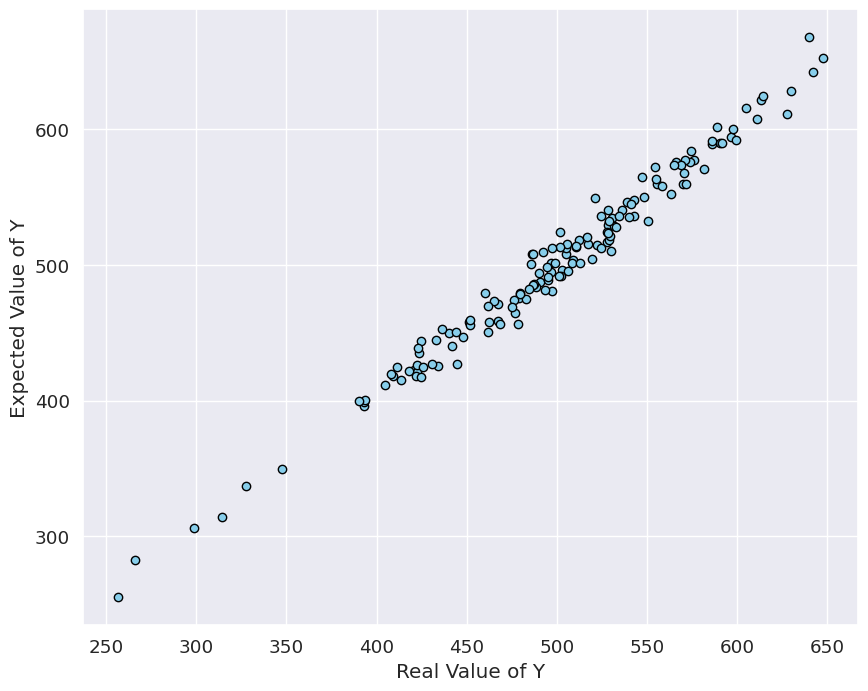

In [124]:
#Plot - scatter
plt.figure(figsize = (10,8))
plt.scatter(x = y_test, y = pred_v1, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Real Value of Y')
plt.ylabel('Expected Value of Y');

Interpretion:

From the scatterplot, we can see that there is a very strong correlation between the predicted y's and the actual y's in the test data.

This means that we have a very good

##METRICS (LINEAR REGRESSION)

In [125]:
# Average amount spent by customers
df['total_value_spent'].mean()

499.31403826080003

In [126]:
# Minimum value
df['total_value_spent'].min()

256.6705823

In [127]:
# Maximum value
df['total_value_spent'].max()

765.5184619

In [128]:
# MAE - Mean Absolute Error
mean_absolute_error(y_test, pred_v1)

7.762418645778977

Interpreting:

- MAE, represents the mean of the absolute differences between the values predicted by the model and the actual values.

- In the specific context of my linear regression model, a MAE of 7.7624 indicates that, on average, the predictions made by the model differ by approximately 7.7624 units from the actual values. The smaller the MAE value, the better the model performance, as it indicates a smaller discrepancy between predictions and actual values.

In [129]:
# MSE - Mean squared error
mean_squared_error(y_test, pred_v1)

94.95654308438658

Interpreting:

- MSE, places greater emphasis on larger errors, as errors are squared before being calculated. Therefore, higher MSE values indicate a greater dispersion of squared errors.

- In general, a lower MSE indicates a better fit of the model to the data, as the errors are smaller in magnitude.

In [130]:
# RMSE - Square Root Mean Squared Error
np.sqrt(mean_squared_error(y_test, pred_v1))

9.744564797074654

Interpreting:

- RMSE is an evaluation metric commonly used in regression problems. It represents the square root of the MSE and provides a measure of the standard deviation of model errors. The RMSE is useful for understanding the dispersion of errors and is expressed in the same unit as the output variable.

- The smaller the RMSE value, the better the performance of the model, as it indicates a smaller dispersion of errors.

In [131]:
# R2 coefficient (range from 0 to 1: the higher, the better)
r2_score(y_test, pred_v1)

0.9813622791776302

Interpretation:

- R² is an evaluation metric commonly used in regression problems. It ranges from 0 to 1 and indicates the proportion of the total variability in the data that is explained by the model. The closer to 1 for the R² value, the better the fit of the model to the data.

- In the case of your model, an R² of 0.9814 indicates that approximately 98.14% of the variability in the data is explained by the model's independent variables. This suggests a good fit and a high predictive power of the model.

In [132]:
# Explained Variance (range from 0 to 1: how much variance the model manages to explain
explained_variance_score(y_test, pred_v1)

0.981744918342864

Interpretation:

- The Explained Variance Score is an evaluation metric used to measure how well the regression model can explain data variability. The value ranges from 0 to 1, with 1 indicating a perfect model that can explain all data variance.

- In your case, an Explained Variance Score of 0.9817 indicates that the model is able to explain about 98.17% of the total variance of the data. This suggests a good fit of the model to the data and a high predictive power.

**INTERPRETATION OF THE FINAL RESULT:**
___
1- MAE (Mean Absolute Error): The MAE value is 7.7624. This means that, on average, the predictions made by the model differ approximately 7.7624 units from the actual values. The lower the MAE value, the better the model's performance in terms of accuracy.

2- MSE (Mean Squared Error): The MSE value is 94.9565. This indicates that, on average, the square of the model's prediction errors is approximately 94.9565. The MSE is a metric that penalizes larger errors more intensely than the MAE.

3- RMSE (Root Mean Squared Error): The RMSE value is 9.7446. This metric represents the square root of MSE and provides a measure of the standard deviation of model errors. The smaller the RMSE value, the smaller the error dispersion and the better the fit of the model to the data.

4- R² Score (Coefficient of Determination): The value of the R² Score is 0.9814. This metric indicates that approximately 98.14% of the data variability is explained by the model. A value close to 1 for the R² Score suggests that the model has a good fit to the data and a high predictive capacity.

5- Explained Variance Score: The value of the Explained Variance Score is 0.9817. This indicates that about 98.17% of the total data variance is explained by the model. This metric reinforces the model's ability to explain data variability.

**Overall, based on these metrics, we can interpret that the model performs well and is able to make accurate predictions and explain most of the variability in the data.**

##WASTE (LINEAR REGRESSION)

They are the difference between the actual value of Y (y_test) and the predicted value of Y (pred_v1)

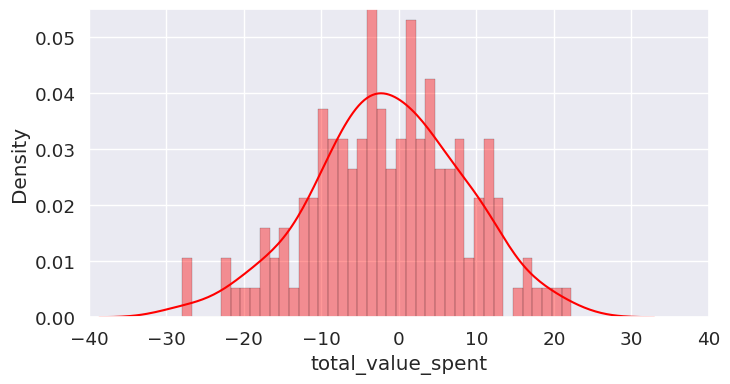

In [133]:
# Plot - Distplot
plt.figure(figsize = (8,4))
ax = sns.distplot((y_test - pred_v1),
bins = 40,
color = 'red',
hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

Interpreting:

The residuals are approximately normally distributed, which indicates a good fit of the model.

#**CONSTRUCTION, TRAINING AND EVALUATION OF MODEL 2 WITH RIDGE REGRESSION**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

**MODEL EXPLANATION:**

The Ridge regression model is a regularized regression technique that aims to address the problem of multicollinearity (high correlation between independent variables) and reduce model complexity. It adds a penalty term to the loss function during model training, forcing the coefficients to approach zero.

Ridge regression uses a regularization approach by adding a regularization term to the model's cost function. This regularization term is controlled by a hyperparameter called the regularization parameter (lambda or alpha). The higher the value of the regularization parameter, the greater the penalty applied to the model's coefficients.

The addition of the regularization term has the effect of shrinking the coefficients of the model, particularly those that are less relevant to the output variable. This reduces the risk of overfitting, where the model fits the training data very well but performs poorly on new data.

When fitting the Ridge regression model to the training data, the algorithm finds the coefficients that minimize the sum of squared errors (MSE), plus the regularization term. During training, the coefficients are regularized to avoid large values and minimize the impact of multicollinearity.

Ridge regression is particularly useful when there is multicollinearity among the independent variables and when it is desired to reduce model complexity. However, it is important to find an appropriate value for the regularization parameter, as a value that is too high can result in underfitting, while a value that is too low may not have a significant effect on reducing multicollinearity.

In summary, the Ridge regression model is an approach that adds a penalty to the model's coefficients to avoid overfitting and address multicollinearity, allowing for a more stable and simplified fit to the training data.

**EXAMPLES OF ALPHA VALUES:**

The three alpha values used in the example (0.1, 1.0, and 10.0) represent different levels of regularization applied to the Ridge regression model.

- Alpha = 0.1: In this case, the regularization is relatively low. This means that the model coefficients will be less constrained and freer to take on larger values. The model will have a greater tendency to fit the training data, which may result in a greater risk of overfitting, especially if there is multicollinearity between the independent variables.

- Alpha = 1.0: This alpha value represents moderate regularization. The penalty applied to the coefficients is a bit stronger compared to alpha value equal to 0.1. This will result in slightly smaller coefficients in magnitude and therefore a slightly more simplified model. It may be a reasonable alpha value to find a balance between fit to the data and model complexity.

- Alpha = 10.0: Here, we have a stronger regularization. The penalty applied to the coefficients is significantly higher compared to the previous values. This will lead to coefficients that are much smaller in magnitude and consequently to a more simplified model. This alpha value is useful when you want to significantly reduce the influence of less important independent variables and mitigate multicollinearity effects.

Choosing the appropriate alpha value depends on the purpose of the model, the amount of multicollinearity present in the data, and the desired trade-off between fit to the training data and model simplicity. It is common to perform a search on different values of alpha to find the best value that maximizes model performance on data not used in training.

In [136]:
# Creating the model
model_v2 = Ridge(alpha = 1.0)

In [139]:
# Training the model
model_v2.fit(X_train, y_train)

Ridge()

In [140]:
# Viewing the Coefficients:
print('Coefficients: \n', model_v2.coef_)

Coefficients: 
 [63.57245999 26.17198131 38.46758178  0.68013543]


In [141]:
# Putting the Coefficients of predictor variables in a Pandas object (dataf)
df_coef = pd.DataFrame(model_v2.coef_, X.columns, columns = ['Coefficient'])
df_coef

,Coefficient
customer_registration_time,63.572460
average_number_clicks_per_session,26.171981
total_time_logged_app,38.467582
total_time_logged_website,0.680135


##MODEL EVALUATION (RIDGE REGRESSION)

In [142]:
# Predictions with test data
pred_v2 = model_v2.predict(X_test)
pred_v2[:10]

array([513.02461894, 593.71284026, 621.32208364, 495.83827761,
       641.71185412, 615.30802007, 591.87884788, 493.61867235,
       457.70805605, 531.9426755 ])

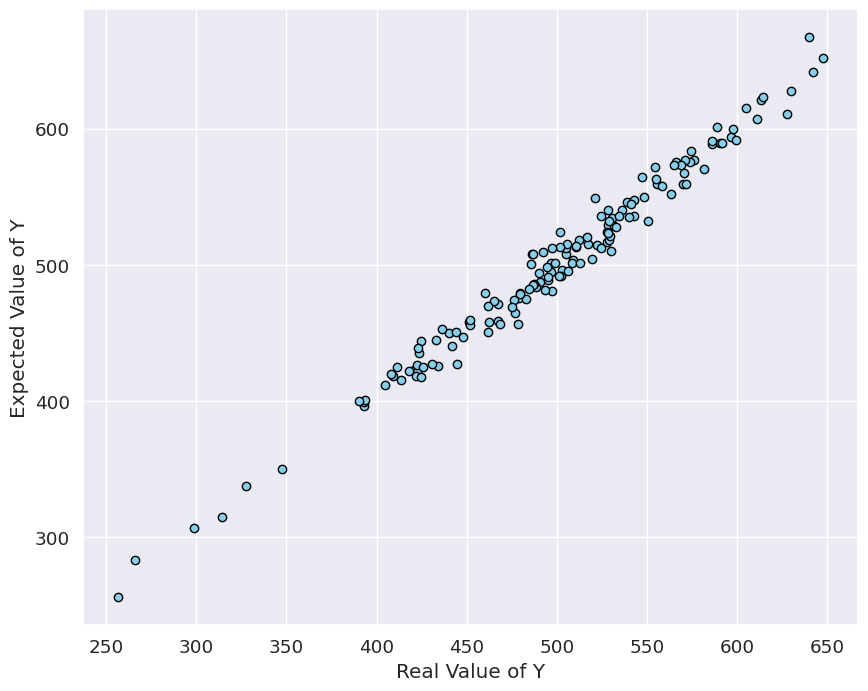

In [143]:
# Plot - Scatter (correlation)
plt.figure(figsize = (10,8))
plt.scatter(x = y_test, y = pred_v2, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Real Value of Y')
plt.ylabel('Expected Value of Y');

interpreting:

Similar to model v1

From the scatterplot, we can see that there is a very strong correlation between the predicted y's and the actual y's in the test data.

This means that we have a very good

##METRICS (RIDGE REGRESSION)

In [146]:
# MAE
mean_absolute_error(y_test, pred_v2)

7.764151148981964

interpreting:

Similar to model v1

In [147]:
# MSE
mean_squared_error(y_test, pred_v2)

94.93731602493466

interpreting:

Similar to model v1

In [149]:
# RMSE
np.sqrt(mean_squared_error(y_test, pred_v2))

9.7435781941202

interpreting:

Similar to model v1

In [151]:
# R2 coefficient
r2_score(y_test, pred_v2)

0.981366052994101

interpreting:

Similar to model v1

In [152]:
# Variance Explained
explained_variance_score(y_test, pred_v2)

0.9817472659016085

**INTERPRETATION OF THE FINAL RESULT:**
___

Similar to model v1

##WASTE (RIDGE REGRESSION)

They are the difference between the actual value of Y (y_test) and the predicted value of Y (pred_v1)

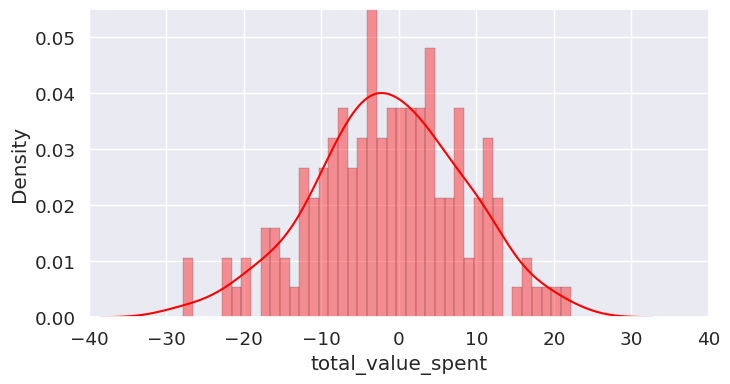

In [153]:
# Plot - Distplot
plt.figure(figsize = (8,4))
ax = sns.distplot((y_test - pred_v2),
bins = 40,
color = 'red',
hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

interpreting:

Similar to model v1

The residuals are approximately normally distributed, which indicates a good fit of the model.

#**CONSTRUCTION, TRAINING AND EVALUATION OF MODEL 3 WITH LASSO REGRESSION**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

**MODEL EXPLANATION:**

Lasso regression, also known as L1 regularization, is a linear regression method that adds an L1 penalty (L1 norm) to the loss function. This L1 penalty is controlled by the regularization parameter, usually denoted as "alpha" or "lambda".

The main feature of Lasso regression is that it has the ability to perform automatic selection of variables, that is, it can estimate predictor coefficients, while reducing some of them to zero. This makes Lasso a useful method for dealing with high-dimensional datasets where there are a large number of independent variables.

The addition of the L1 penalty causes the Lasso to minimize the sum of the residuals while constraining the sum of the absolute values of the coefficients. This restriction results in a sparse solution, in which some coefficients are exactly equal to zero, thus eliminating irrelevant variables.

Unlike Ridge regression, which uses an L2 penalty (L2 norm) to smooth coefficients without completely eliminating them, Lasso tends to estimate coefficients exactly equal to zero to eliminate unnecessary variables, which can also help with model interpretation.

Choosing the appropriate value for the regularization parameter (alpha or lambda) is important. Higher values of alpha tend to result in more zero coefficients, while lower values allow more coefficients to be maintained in the model. It is common to perform a search on different alpha values to find the best balance between fit to the data and simplicity of the model.

In [155]:
# Create the model
model_v3 = Lasso(alpha = 1.0)

In [157]:
# Training the model
model_v3.fit(X_train, y_train)

Lasso()

In [158]:
# Checking the Coefficients of the model
print('Coefficients: \n', model_v3.coef_)

Coefficients: 
 [62.86344076 25.18747244 37.62149243  0.        ]


In [159]:
# Putting the Coefficients of predictor variables in a Pandas object (dataf
df_coef = pd.DataFrame(model_v3.coef_, X.columns, columns = ['Coefficient'])
df_coef

,Coefficient
customer_registration_time,62.863441
average_number_clicks_per_session,25.187472
total_time_logged_app,37.621492
total_time_logged_website,0.000000


##MODEL EVALUATION (LASSO REGRESSION)

In [160]:
# Predictions with test data:
pred_v3 = model_v3.predict(X_test)
pred_v3[:10]

array([511.50216083, 591.78590214, 619.24047552, 497.55162062,
       640.89951717, 614.42803424, 590.05764493, 494.76617949,
       459.30498489, 529.64197449])

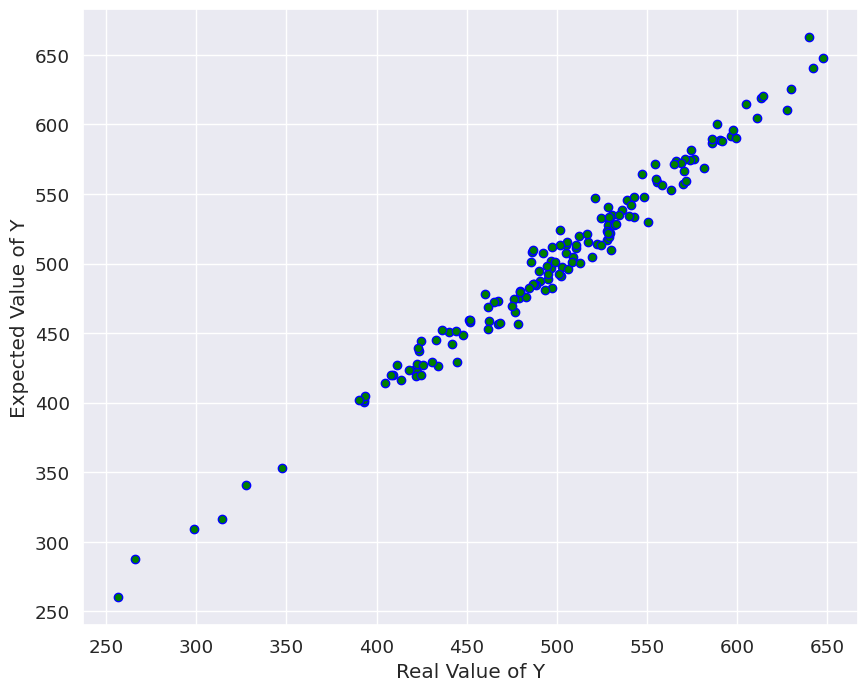

In [162]:
# Plot - Scatter:
plt.figure(figsize = (10,8))
plt.scatter(x = y_test, y = pred_v3, color = 'green', edgecolors = 'blue')
plt.xlabel('Real Value of Y')
plt.ylabel('Expected Value of Y');

interpreting:

Similar to model v1

##METRICS (LASSO REGRESSION)

In [163]:
# MAE
mean_absolute_error(y_test, pred_v3)

7.7885046969510645

In [164]:
# MSE
mean_squared_error(y_test, pred_v3)

96.05606348970672

In [165]:
# RMSE
np.sqrt(mean_squared_error(y_test, pred_v3))

9.800819531534428

In [166]:
# R2 coefficient
r2_score(y_test, pred_v2)

0.981366052994101

In [167]:
# Explained Variance
explained_variance_score(y_test, pred_v3)

0.9815600649101045

**INTERPRETATION OF THE FINAL RESULT:**
___

1- MAE (Mean Absolute Error): The MAE value is approximately 7.79. This means that, on average, the model predictions are deviating around 7.79 units from the actual values. The smaller the MAE value, the better the model performance.

2- MSE (Mean Squared Error): The MSE value is approximately 96.06. This represents the average of the squared errors between the predictions and the actual values. The lower the MSE value, the better the model performance.

3- RMSE (Root Mean Squared Error): The RMSE value is approximately 9.80. This metric is the square root of MSE and represents the standard deviation of model errors. The smaller the RMSE value, the better the fit of the model to the data.

4- R2 Score: The value of the R2 Score is approximately 0.981, which indicates that the model is able to explain about 98.1% of the variability of the output data. This metric ranges from 0 to 1, with 1 being the best possible result. Therefore, an R2 Score value close to 1 indicates a good fit of the model to the data.

5- Explained Variance Score: The value of the Explained Variance Score is approximately 0.9816. This metric measures the proportion of the total variance in the output data that is explained by the model. The closer the value is to 1, the better the model is explaining the variability in the data.

**Based on these metrics, we can conclude that the model performs very well overall. It has low errors (MAE, MSE and RMSE) and is able to explain a large proportion of the data variability (R2 Score and Explained Variance Score). However, it is always important to consider the specific problem context and data characteristics when interpreting model performance.**

## WASTE (LASSO REGRESSION)

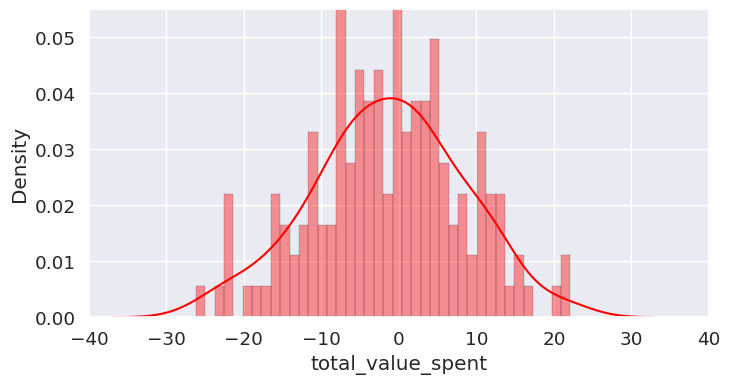

In [168]:
# Plot - Distplot
plt.figure(figsize = (8,4))
ax = sns.distplot((y_test - pred_v3),
bins = 40,
color = 'red',
hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

#**MODEL SELECTION:**

**COMPARISON OF LINEAR REGRESSION AND LASSO REGRESSION:**

1- MAE (Mean Absolute Error): The linear regression model has a slightly smaller MAE (7,762) compared to the Lasso regression model (7,789). This indicates that the linear regression model has better average accuracy in predicting the output values.

2- MSE (Mean Squared Error): The linear regression model has a slightly lower MSE (94,956) compared to the Lasso regression model (96,056). This indicates that the linear regression model performs better in reducing mean squared errors.

3- RMSE (Root Mean Squared Error): The linear regression model has a slightly lower RMSE (9,745) compared to the Lasso regression model (9,801). This indicates that the linear regression model has better accuracy in predicting the output values in terms of square root mean square error.

4- R2 Score: The R2 score is practically the same for both models, being approximately 0.9814. This indicates that both models have a good fit to the data and explain about 98.14% of the variation in the output variable.

5- Explained Variance Score: The linear regression model has a slightly higher value for the explained variance score (0.982) compared to the Lasso regression model (0.982). This indicates that the linear regression model has a better ability to explain the variation in the data.

**INTERPRETING:**

Based on these metrics, it can be concluded that the linear regression model performs slightly better in terms of predicting the output values compared to the Lasso regression model. However, the difference between the two models is small and both show a good fit to the data. Choosing the best model will depend on the specific requirements of the problem and the relative importance of the evaluated metrics.

Since the Linear Regression model and the Ridge Regression model were similar, I opted for the simpler model to explain.

#**CONCLUSION:**

In [170]:
# Checking the first lines:
df.head(5)

,customer_registration_time,average_number_clicks_per_session,total_time_logged_app,total_time_logged_website,total_value_spent
0,3.472021,33.119954,12.953263,37.034280,534.771485
1,4.198349,35.371876,10.572467,36.862183,537.915753
2,2.086348,33.976083,11.658037,37.425279,407.876378
3,3.605934,34.034164,13.592513,36.838657,618.845970
4,4.034386,32.770492,11.371767,35.261498,502.771075


In [172]:
# Coefficients:
df_coef_final = pd.DataFrame(model_v1.coef_, X.columns, columns = ['Coefficient'])
df_coef_final

,Coefficient
customer_registration_time,63.742207
average_number_clicks_per_session,26.239016
total_time_logged_app,38.571856
total_time_logged_website,0.684737


<Axes: >

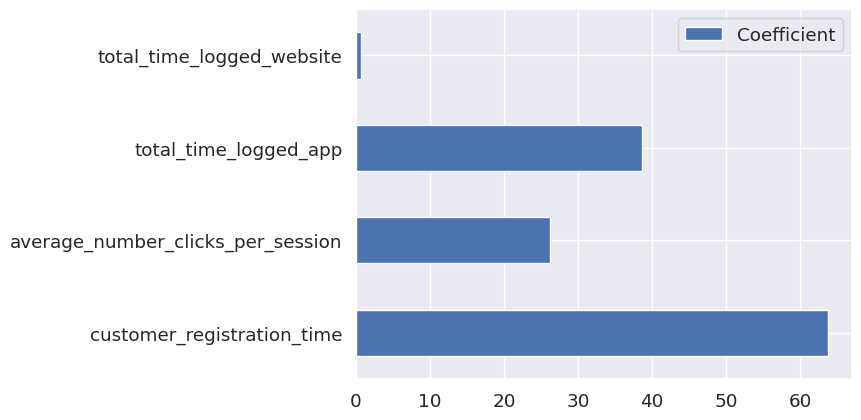

In [173]:
# Plot - Horizontal Bars - of the Coefficients:
df_coef_final.plot.barh(rot = 0)

**INTERPRETATION OF COEFFICIENTS:**
___

1- Keeping all other resources fixed, an increase of 1 unit in the time of customer registration is associated with an increase of BRL 63.74 in the total amount spent per customer in the month;


2- Keeping all other features fixed, an increase of 1 unit in the average number of clicks per session is associated with an increase of BRL 26.24 in the total amount spent per customer in the month;


3- Keeping all other features fixed, an increase of 1 unit in the total time logged into the app is associated with an increase of BRL 38.57 in the total amount spent per customer in the month;


4- Keeping all other resources fixed, an increase of 1 unit in the total time logged on the website is associated with an increase of R$ 0.68 in the total amount spent per customer in the month;


**We can see that it will be more profitable for the company to invest in updating its App since the return will be higher. In addition, it is important to create policies to retain the customer for longer, as this also leads to increased sales. The update itself App will be a way to retain the customer for longer.**


**At the moment, it is not worth investing in updating the Web Site as the return will be minimal.**

**END OF REPORT!**